In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [2]:
vc=pd.read_csv('victim_rape.csv')
vc

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1045,West Bengal,2009,Victims of Incest Rape,3,0,0,1,1,1,3,0
1046,West Bengal,2009,Victims of Other Rape,2333,0,18,84,1834,391,2333,6
1047,West Bengal,2010,Total Rape Victims,2311,0,22,51,1779,459,2311,0
1048,West Bengal,2010,Victims of Incest Rape,4,0,1,0,2,1,4,0


In [3]:
vc.dtypes

Area_Name                    object
Year                          int64
Subgroup                     object
Rape_Cases_Reported           int64
Victims_Above_50_Yrs          int64
Victims_Between_10-14_Yrs     int64
Victims_Between_14-18_Yrs     int64
Victims_Between_18-30_Yrs     int64
Victims_Between_30-50_Yrs     int64
Victims_of_Rape_Total         int64
Victims_Upto_10_Yrs           int64
dtype: object

In [4]:
vc.Subgroup

0           Total Rape Victims
1       Victims of Incest Rape
2        Victims of Other Rape
3           Total Rape Victims
4       Victims of Incest Rape
                 ...          
1045    Victims of Incest Rape
1046     Victims of Other Rape
1047        Total Rape Victims
1048    Victims of Incest Rape
1049     Victims of Other Rape
Name: Subgroup, Length: 1050, dtype: object

In [5]:
vc.columns

Index(['Area_Name', 'Year', 'Subgroup', 'Rape_Cases_Reported',
       'Victims_Above_50_Yrs', 'Victims_Between_10-14_Yrs',
       'Victims_Between_14-18_Yrs', 'Victims_Between_18-30_Yrs',
       'Victims_Between_30-50_Yrs', 'Victims_of_Rape_Total',
       'Victims_Upto_10_Yrs'],
      dtype='object')

In [6]:
vc.shape

(1050, 11)

In [7]:
vc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Area_Name                  1050 non-null   object
 1   Year                       1050 non-null   int64 
 2   Subgroup                   1050 non-null   object
 3   Rape_Cases_Reported        1050 non-null   int64 
 4   Victims_Above_50_Yrs       1050 non-null   int64 
 5   Victims_Between_10-14_Yrs  1050 non-null   int64 
 6   Victims_Between_14-18_Yrs  1050 non-null   int64 
 7   Victims_Between_18-30_Yrs  1050 non-null   int64 
 8   Victims_Between_30-50_Yrs  1050 non-null   int64 
 9   Victims_of_Rape_Total      1050 non-null   int64 
 10  Victims_Upto_10_Yrs        1050 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 90.4+ KB


In [8]:
vc.describe()

,Year,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
count,1050.00000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,2005.50000,361.920000,1.866667,23.657143,53.085714,212.937143,60.236190,362.198095,10.415238
std,2.87365,592.180572,4.640286,50.677418,115.127899,350.135760,118.322713,592.418089,19.533134
min,2001.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.00000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000
50%,2005.50000,37.000000,0.000000,3.000000,5.000000,15.500000,4.000000,37.000000,2.000000
75%,2008.00000,527.500000,1.000000,19.000000,42.000000,308.000000,58.750000,531.500000,11.000000
max,2010.00000,3135.000000,43.000000,416.000000,826.000000,1835.000000,811.000000,3136.000000,131.000000


OBSERVATIONS

-->THERE IS LOT OF DIFFERENCE BETWEEN MEAN AND MEDIAN VALUES IN RAPE CASES REPORTED,VICTIMS OF ALL AGE CASES
-->BUT ALSO THERE IS LOT OF DIFFERENCE BETWEEN 75% AND MAX
-->BY THE ABOVE OBSERVATIONS THERE MUST BE LOT OF OUTLIERS PRESENCE

In [9]:
vc.isnull()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1045,False,False,False,False,False,False,False,False,False,False,False
1046,False,False,False,False,False,False,False,False,False,False,False
1047,False,False,False,False,False,False,False,False,False,False,False
1048,False,False,False,False,False,False,False,False,False,False,False


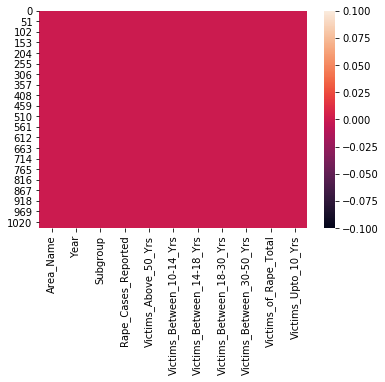

In [10]:
sns.heatmap(vc.isnull())

OBSERVATIONS

-> THERE ARE NO NULL VALUES

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A7226CF08>,
      dtype=object)

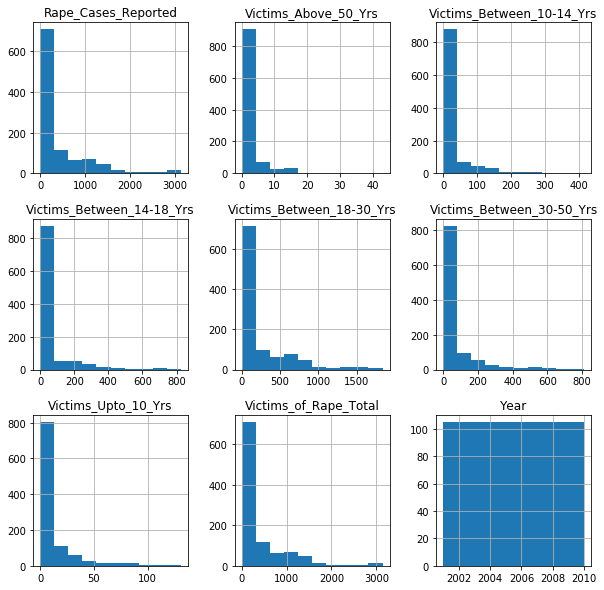

In [11]:
vc.hist(figsize=(10,10))

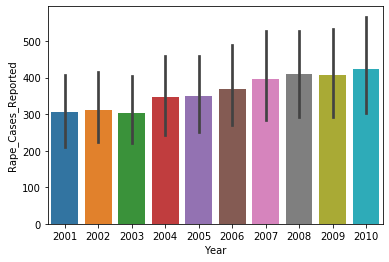

In [12]:
sns.barplot(x=vc['Year'],y=vc['Rape_Cases_Reported'])

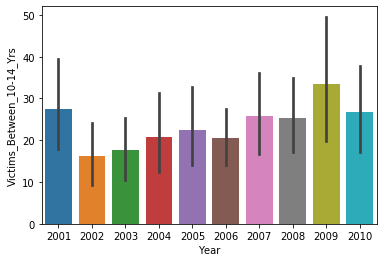

In [13]:
sns.barplot(x=vc['Year'],y=vc['Victims_Between_10-14_Yrs'])

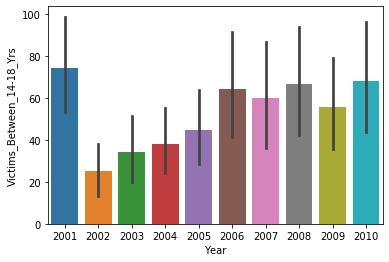

In [14]:
sns.barplot(x=vc['Year'],y=vc['Victims_Between_14-18_Yrs'])

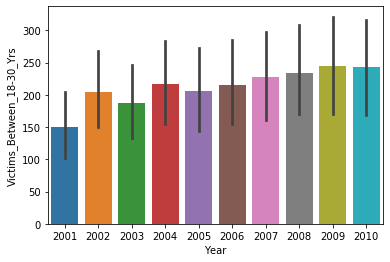

In [15]:
sns.barplot(x=vc['Year'],y=vc['Victims_Between_18-30_Yrs'])

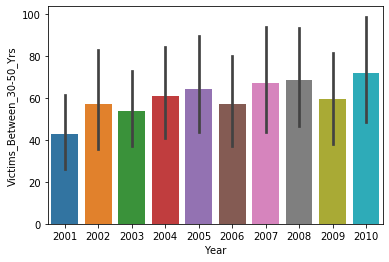

In [16]:
sns.barplot(x=vc['Year'],y=vc['Victims_Between_30-50_Yrs'])

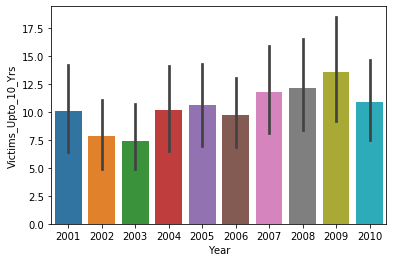

In [17]:
sns.barplot(x=vc['Year'],y=vc['Victims_Upto_10_Yrs'])

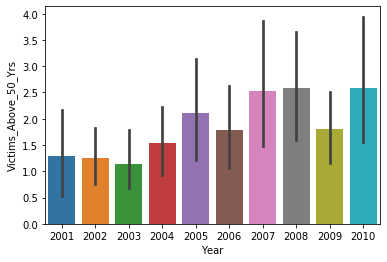

In [18]:
sns.barplot(x=vc['Year'],y=vc['Victims_Above_50_Yrs'])

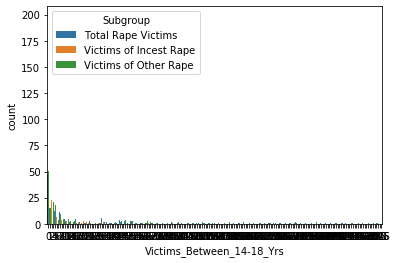

In [19]:
sns.countplot(x='Victims_Between_14-18_Yrs',hue='Subgroup',data=vc)

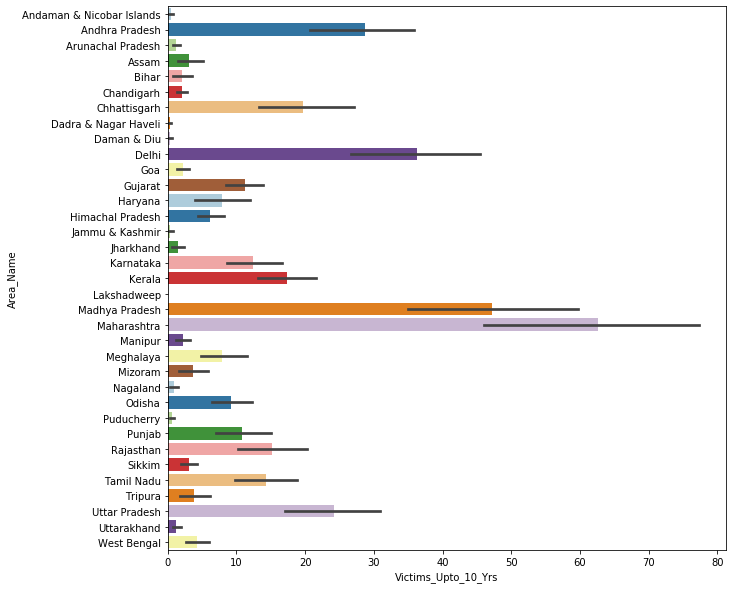

In [20]:
plt.figure(figsize=(10,10))
sns.barplot(x=vc['Victims_Upto_10_Yrs'],y=vc['Area_Name'],palette='Paired')

OBSERVATIONS
--> TOTAL NO OF CHILD ABUSES UPTO 10 YEARS HIGHER IN MAHARASHTRA,FOLLOWED BY MADHYA PRADESH,DELHI

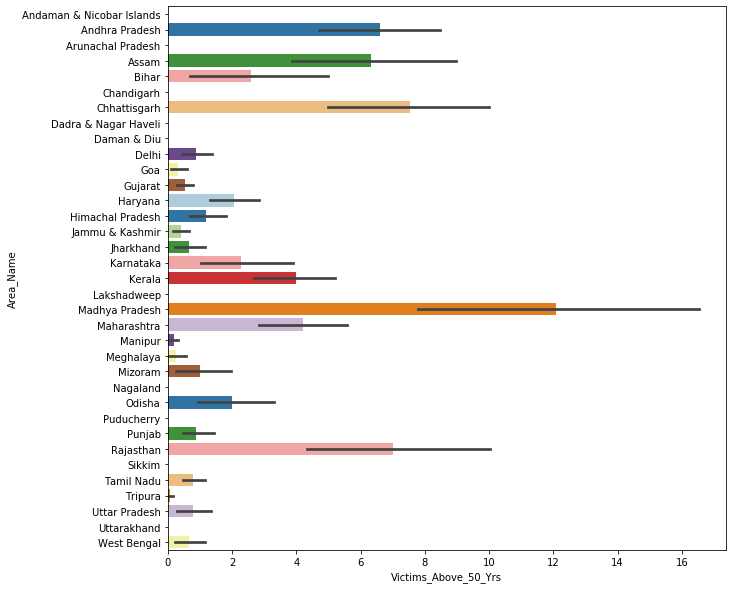

In [21]:
plt.figure(figsize=(10,10))
sns.barplot(x=vc['Victims_Above_50_Yrs'],y=vc['Area_Name'],palette='Paired')

OBSERVATIONS
--> TOTAL NO OF RAPE VICTIMS ABOVE 50 YEARS ARE HIGHER IN MADHYA PRADESH STATE FOLLOWED BY RAJASTHAN

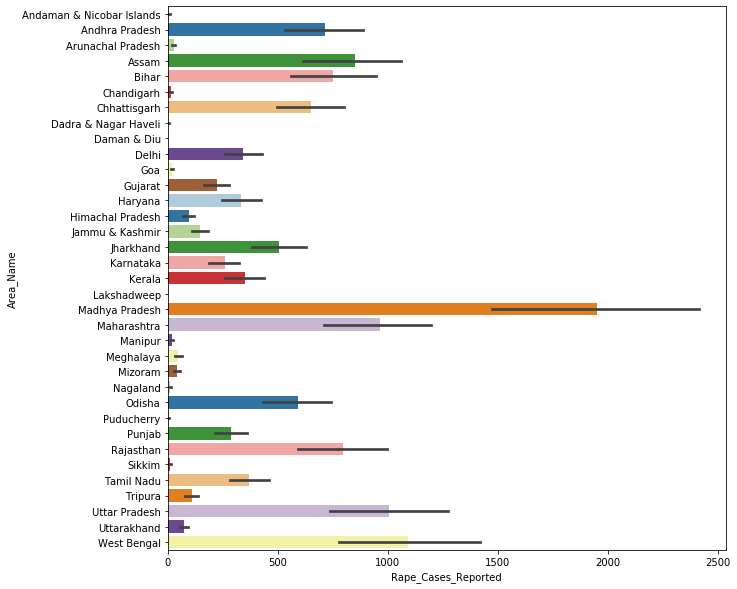

In [22]:
plt.figure(figsize=(10,10))
sns.barplot(x=vc['Rape_Cases_Reported'],y=vc['Area_Name'],palette='Paired')

OBSERVATIONS
--> TOTAL NO OF RAPE CASES REPORTED HIGHEST IN MADHYA PRADESH FOLLOWED BY WEST BENGAL,UTTAR PRADESH,MAHARASHTRA 

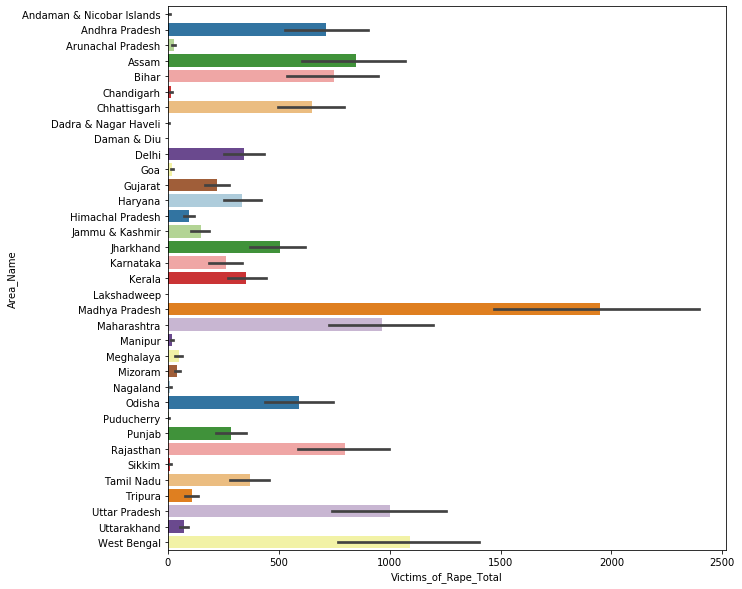

In [23]:
plt.figure(figsize=(10,10))
sns.barplot(x=vc['Victims_of_Rape_Total'],y=vc['Area_Name'],palette='Paired')

OBSERVATIONS
--> TOTAL NO OF RAPE VICTIMS ARE HIGHER IN MADHYA PRADESH,WEST BENGAL,ASSAM,U.P,A.P

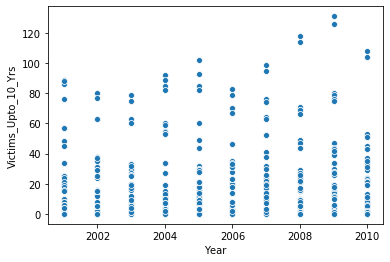

In [24]:
sns.scatterplot(x=vc['Year'],y=vc['Victims_Upto_10_Yrs'])

In [25]:
incest_rape_victims = vc[vc['Subgroup'] == 'Victims of Incest Rape']

incest_rape_victims.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0
7,Andaman & Nicobar Islands,2003,Victims of Incest Rape,0,0,0,0,0,0,0,0
10,Andaman & Nicobar Islands,2004,Victims of Incest Rape,0,0,0,0,0,0,0,0
13,Andaman & Nicobar Islands,2005,Victims of Incest Rape,0,0,0,0,0,0,0,0


In [26]:
other_rape_victims = vc[vc['Subgroup'] == 'Victims of Other Rape']
other_rape_victims.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
5,Andaman & Nicobar Islands,2002,Victims of Other Rape,2,0,0,1,1,0,2,0
8,Andaman & Nicobar Islands,2003,Victims of Other Rape,2,0,0,1,0,0,2,1
11,Andaman & Nicobar Islands,2004,Victims of Other Rape,10,0,1,7,1,1,10,0
14,Andaman & Nicobar Islands,2005,Victims of Other Rape,4,0,0,2,2,0,4,0


In [27]:
total_rape_victims = vc[vc['Subgroup'] == 'Total Rape Victims']
total_rape_victims.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
6,Andaman & Nicobar Islands,2003,Total Rape Victims,2,0,0,1,0,0,2,1
9,Andaman & Nicobar Islands,2004,Total Rape Victims,10,0,1,7,1,1,10,0
12,Andaman & Nicobar Islands,2005,Total Rape Victims,4,0,0,2,2,0,4,0


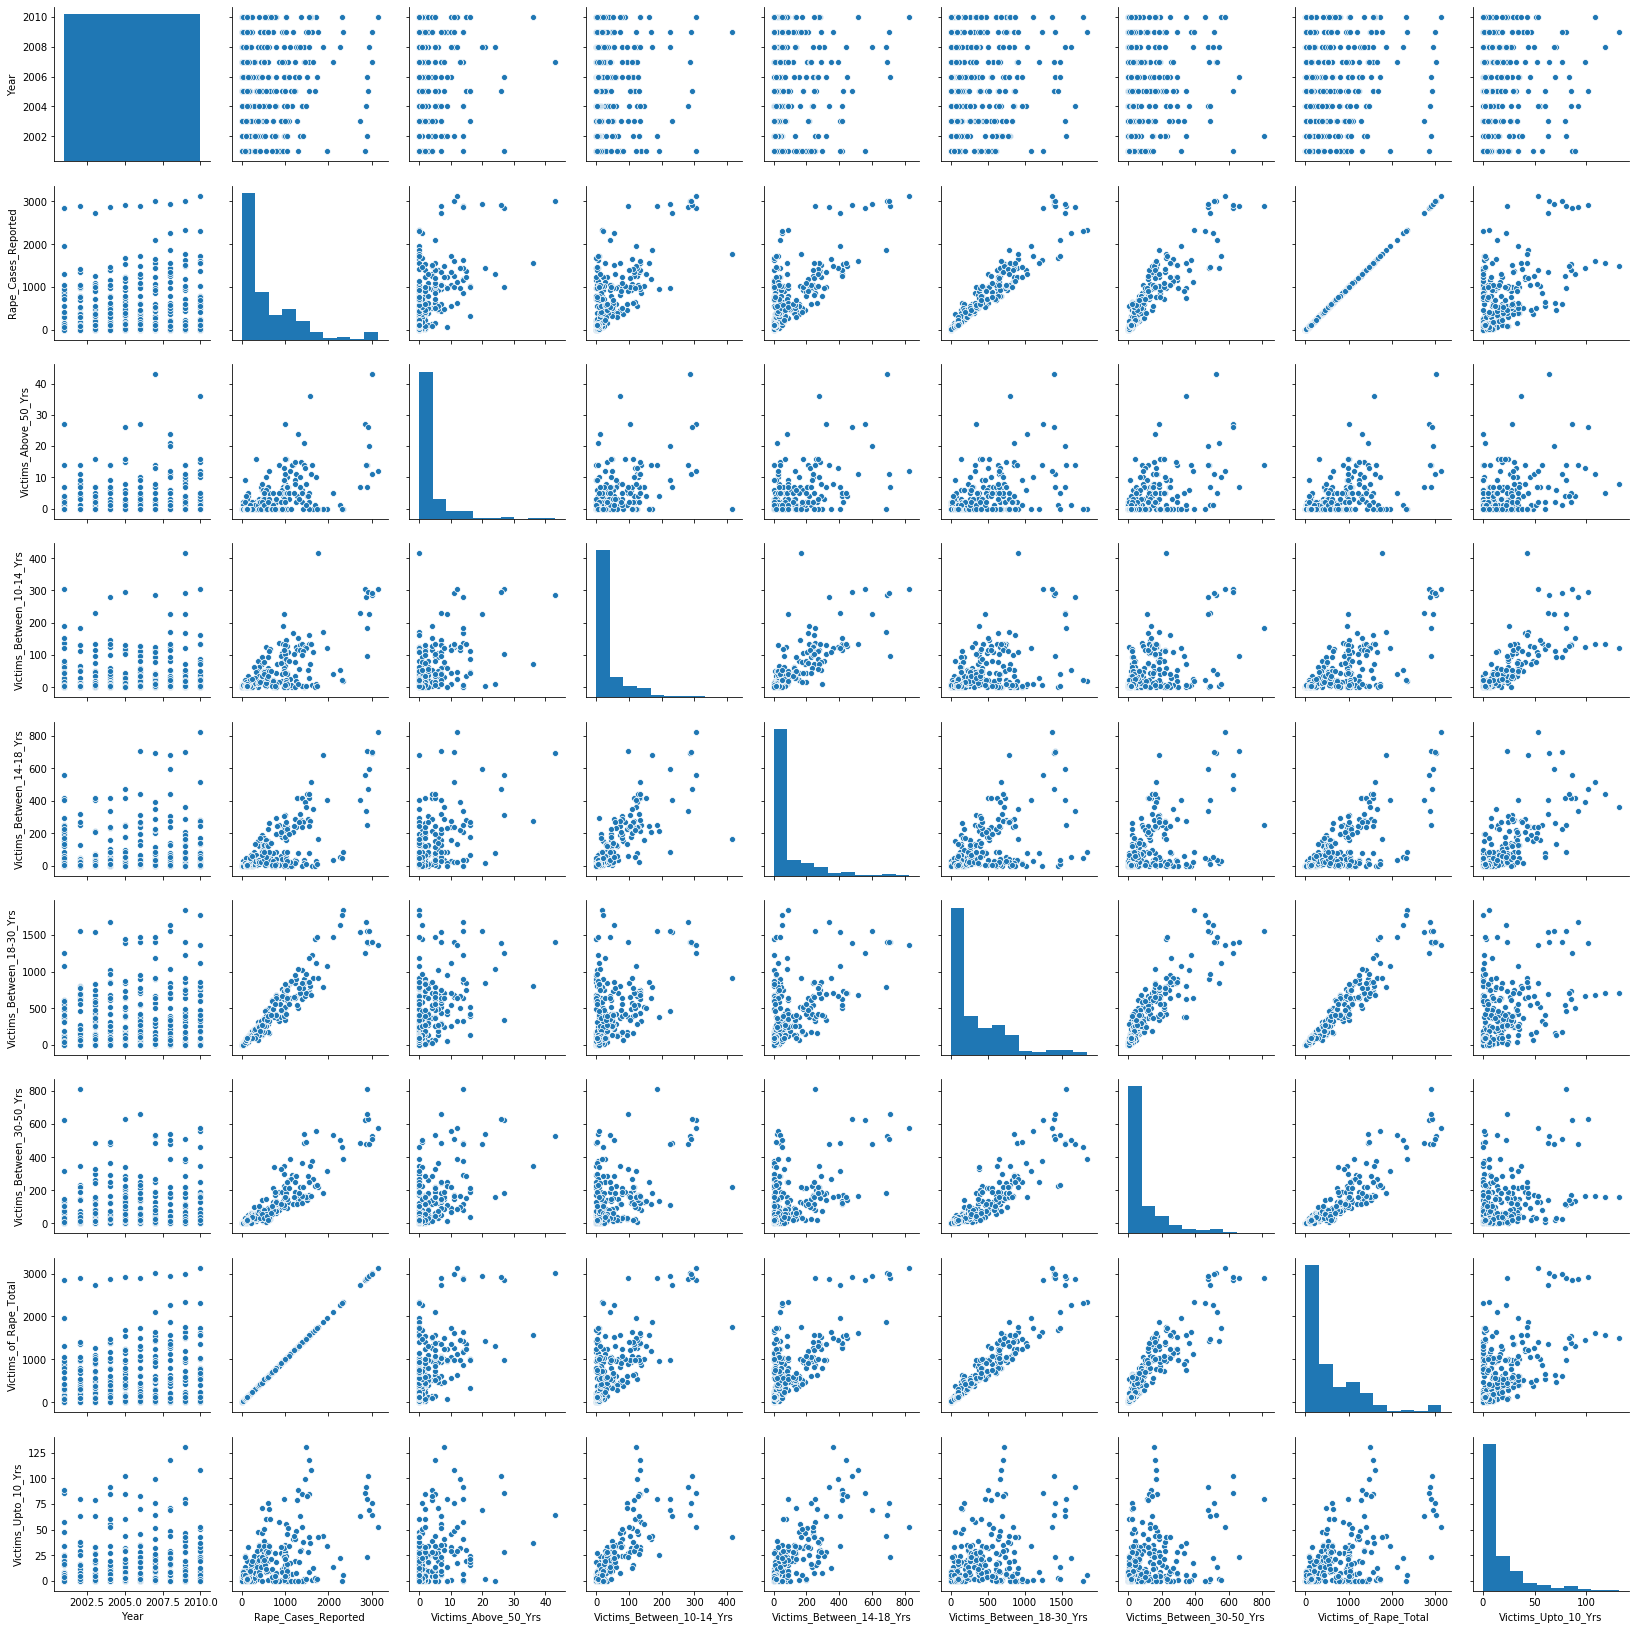

In [28]:
# lets show pairplot
sns.pairplot(total_rape_victims)

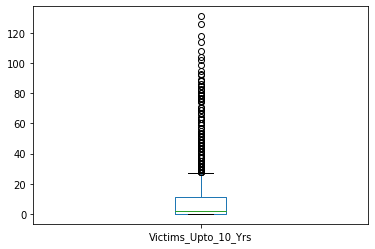

In [29]:
vc['Victims_Upto_10_Yrs'].plot.box()

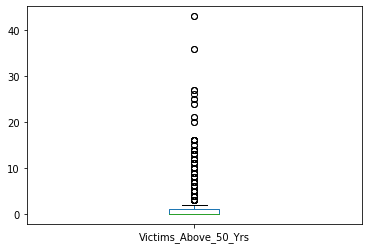

In [30]:
vc['Victims_Above_50_Yrs'].plot.box()

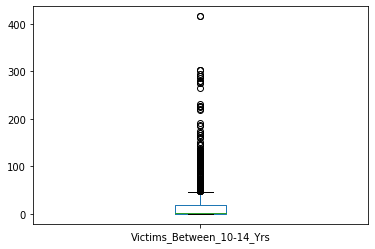

In [31]:
vc['Victims_Between_10-14_Yrs'].plot.box()

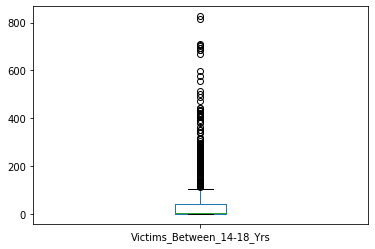

In [32]:
vc['Victims_Between_14-18_Yrs'].plot.box()

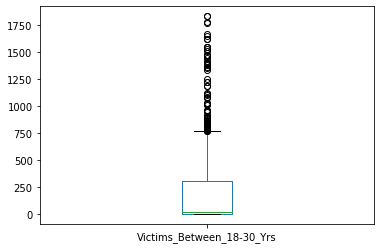

In [33]:
vc['Victims_Between_18-30_Yrs'].plot.box()

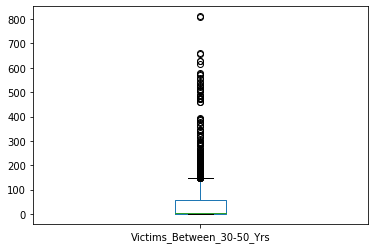

In [34]:
vc['Victims_Between_30-50_Yrs'].plot.box()

In [35]:
vc.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


In [36]:
vc.drop('Area_Name',axis=1,inplace=True)
vc.head()

,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


In [37]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [38]:
label=le.fit_transform(vc['Subgroup'])

In [39]:
label

array([0, 1, 2, ..., 0, 1, 2])

In [40]:
le.classes_

array(['Total Rape Victims', 'Victims of Incest Rape',
       'Victims of Other Rape'], dtype=object)

In [41]:
vc=vc.drop('Subgroup',axis='columns')

In [42]:
vc['Subgroup']=label

In [43]:
vc.head()

,Year,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Subgroup
0,2001,3,0,0,3,0,0,3,0,0
1,2001,1,0,0,1,0,0,1,0,1
2,2001,2,0,0,2,0,0,2,0,2
3,2002,2,0,0,1,1,0,2,0,0
4,2002,0,0,0,0,0,0,0,0,1


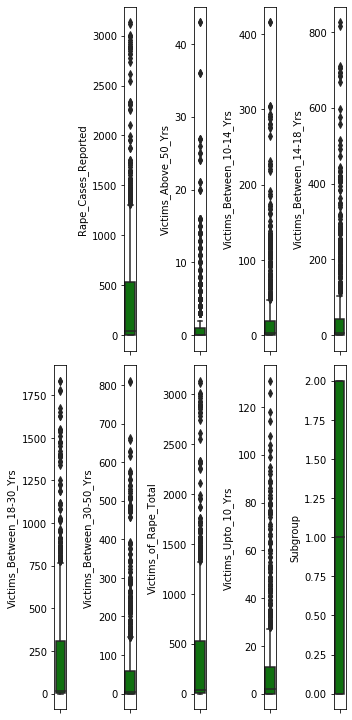

In [44]:
collist=vc.columns.values
ncol=5
nrows=5
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(vc[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [45]:
vc_cor=vc.corr()
vc_cor

,Year,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Subgroup
Year,1.000000,0.070944,0.095368,0.057081,0.060579,0.069109,0.053460,0.071121,0.066608,0.000000
Rape_Cases_Reported,0.070944,1.000000,0.652470,0.762842,0.780262,0.966432,0.925609,0.999998,0.665398,-0.008308
Victims_Above_50_Yrs,0.095368,0.652470,1.000000,0.595057,0.588920,0.566389,0.638712,0.652482,0.514891,-0.006539
Victims_Between_10-14_Yrs,0.057081,0.762842,0.595057,1.000000,0.834968,0.615116,0.599692,0.763069,0.827184,-0.011813
Victims_Between_14-18_Yrs,0.060579,0.780262,0.588920,0.834968,1.000000,0.615138,0.605228,0.780669,0.783994,-0.010562
Victims_Between_18-30_Yrs,0.069109,0.966432,0.566389,0.615116,0.615138,1.000000,0.907376,0.966303,0.529155,-0.006273
Victims_Between_30-50_Yrs,0.053460,0.925609,0.638712,0.599692,0.605228,0.907376,1.000000,0.925359,0.467843,-0.005099
Victims_of_Rape_Total,0.071121,0.999998,0.652482,0.763069,0.780669,0.966303,0.925359,1.000000,0.666310,-0.008311
Victims_Upto_10_Yrs,0.066608,0.665398,0.514891,0.827184,0.783994,0.529155,0.467843,0.666310,1.000000,-0.014279
Subgroup,0.000000,-0.008308,-0.006539,-0.011813,-0.010562,-0.006273,-0.005099,-0.008311,-0.014279,1.000000


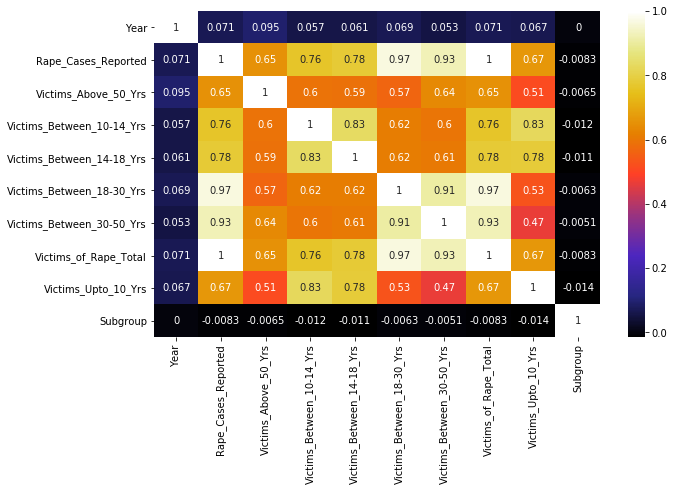

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(vc_cor,cmap='CMRmap',annot=True)

OBSERVATIONS
--> HERE THE CORRELATION BETWEEN ARE HIGHER IN VICTIMS OF TOTAL TO VICTIMS BETWEEN 18-30 YEARS ARE HIGHER SAME AS TO VICTIMS BETWEEN 30-50 YEARS

In [47]:
vc.skew()

Year                         0.000000
Rape_Cases_Reported          2.228595
Victims_Above_50_Yrs         4.151161
Victims_Between_10-14_Yrs    3.554447
Victims_Between_14-18_Yrs    3.327417
Victims_Between_18-30_Yrs    2.089371
Victims_Between_30-50_Yrs    2.905033
Victims_of_Rape_Total        2.226962
Victims_Upto_10_Yrs          2.845238
Subgroup                     0.000000
dtype: float64

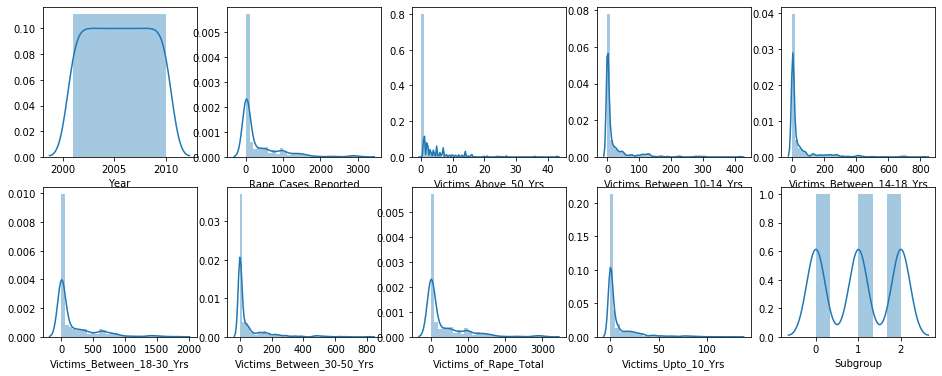

In [48]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(vc[collist[i]])

OBSERVATIONS
-->  ALL OF THEM ARE INDEPENDANT VARIABLES ARE RIGHT SKEWED/ POSITIVELY SKEWD EXCEPTIONAL TO YEAR

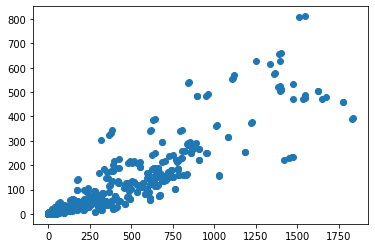

In [49]:
plt.scatter(vc['Victims_Between_18-30_Yrs'],vc['Victims_Between_30-50_Yrs'])

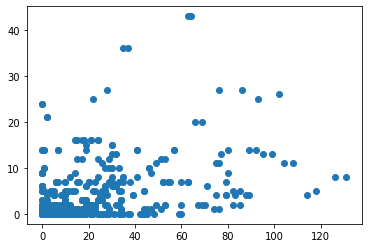

In [50]:
plt.scatter(vc['Victims_Upto_10_Yrs'],vc['Victims_Above_50_Yrs'])

In [51]:
vc.head()

,Year,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Subgroup
0,2001,3,0,0,3,0,0,3,0,0
1,2001,1,0,0,1,0,0,1,0,1
2,2001,2,0,0,2,0,0,2,0,2
3,2002,2,0,0,1,1,0,2,0,0
4,2002,0,0,0,0,0,0,0,0,1


In [52]:
from scipy.stats import zscore
z=np.abs(zscore(vc))
z

array([[1.5666989 , 0.60638774, 0.40246576, ..., 0.60661427, 0.53346284,
        1.22474487],
       [1.5666989 , 0.60976669, 0.40246576, ..., 0.60999187, 0.53346284,
        0.        ],
       [1.5666989 , 0.60807722, 0.40246576, ..., 0.60830307, 0.53346284,
        1.22474487],
       ...,
       [1.5666989 , 3.29292937, 0.40246576, ..., 3.29113949, 0.53346284,
        1.22474487],
       [1.5666989 , 0.60469826, 0.40246576, ..., 0.60492546, 0.53346284,
        0.        ],
       [1.5666989 , 3.28617145, 0.40246576, ..., 3.28438429, 0.53346284,
        1.22474487]])

In [53]:
Threshold=3
print(np.where(z>3))

(array([ 108,  110,  111,  111,  113,  113,  117,  119,  141,  143,  180,
        182,  192,  194,  195,  197,  204,  204,  206,  206,  207,  209,
        285,  288,  290,  291,  293,  486,  488,  570,  570,  570,  570,
        570,  570,  570,  572,  572,  572,  572,  572,  572,  572,  573,
        573,  573,  573,  573,  573,  575,  575,  575,  575,  575,  576,
        576,  576,  576,  576,  576,  578,  578,  578,  578,  578,  579,
        579,  579,  579,  579,  579,  581,  581,  581,  581,  581,  581,
        582,  582,  582,  582,  582,  582,  582,  582,  584,  584,  584,
        584,  584,  584,  584,  584,  585,  585,  585,  585,  585,  587,
        587,  587,  587,  587,  588,  588,  588,  588,  588,  588,  588,
        590,  590,  590,  590,  590,  590,  590,  591,  591,  591,  591,
        591,  591,  591,  591,  593,  593,  593,  593,  593,  593,  593,
        594,  594,  594,  594,  594,  594,  594,  596,  596,  596,  596,
        596,  596,  596,  597,  597,  597,  597,  

In [54]:
z[570][1]

4.205247929497025

In [55]:
vc_new=vc[(z<3).all(axis=1)]
vc_new

,Year,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Subgroup
0,2001,3,0,0,3,0,0,3,0,0
1,2001,1,0,0,1,0,0,1,0,1
2,2001,2,0,0,2,0,0,2,0,2
3,2002,2,0,0,1,1,0,2,0,0
4,2002,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1036,2006,6,0,0,0,6,0,6,0,1
1039,2007,114,0,2,3,81,25,114,3,1
1042,2008,9,0,2,1,1,0,9,5,1
1045,2009,3,0,0,1,1,1,3,0,1


In [56]:
print(vc.shape,vc_new.shape)

(1050, 10) (963, 10)


OBSRERVATION

--> THIS MEANS THAT 87 OUTLIERS ARE REMOVED

In [57]:
vc=vc_new
vc.info()
vc.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 0 to 1048
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Year                       963 non-null    int64
 1   Rape_Cases_Reported        963 non-null    int64
 2   Victims_Above_50_Yrs       963 non-null    int64
 3   Victims_Between_10-14_Yrs  963 non-null    int64
 4   Victims_Between_14-18_Yrs  963 non-null    int64
 5   Victims_Between_18-30_Yrs  963 non-null    int64
 6   Victims_Between_30-50_Yrs  963 non-null    int64
 7   Victims_of_Rape_Total      963 non-null    int64
 8   Victims_Upto_10_Yrs        963 non-null    int64
 9   Subgroup                   963 non-null    int32
dtypes: int32(1), int64(9)
memory usage: 79.0 KB


(963, 10)

In [58]:
x=vc.drop(columns=['Rape_Cases_Reported'])
x.head()

,Year,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Subgroup
0,2001,0,0,3,0,0,3,0,0
1,2001,0,0,1,0,0,1,0,1
2,2001,0,0,2,0,0,2,0,2
3,2002,0,0,1,1,0,2,0,0
4,2002,0,0,0,0,0,0,0,1


In [59]:
y=pd.DataFrame(vc['Rape_Cases_Reported'])
y

,Rape_Cases_Reported
0,3
1,1
2,2
3,2
4,0
...,...
1036,6
1039,114
1042,9
1045,3


In [60]:
# random state value with which our linear model learns maximum
max_r_score=0
for r_state in range (42,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.30)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print('max r2 scoring corresponding to',final_r_state,'is',max_r_score)        

max r2 scoring corresponding to 68 is 0.9999985616911965


In [61]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)    

(674, 9) (289, 9)
(674, 1) (289, 1)


In [62]:
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2')
a_score

array([0.99999904, 0.99997852, 0.99999551, 0.99998456, 0.99999479])

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=68,test_size=0.30)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [101]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))

RMSE: 0.4384105209789838
R2 score: 0.9999985616911965
MAE: 0.24981900701904333
MSE: 0.192203784905064


The r2_score is getting higher

In [81]:
#predict the number of rape victims may occur for upcomming years
#predict the value
pred=lr.predict(x_test)
print('predicted result:',pred)
print('actual:',y_test)

predicted result: [[ 2.18864951e+02]
 [ 1.38342024e+01]
 [ 2.37166450e+02]
 [ 1.04990726e+02]
 [ 3.47781849e+02]
 [ 8.88629600e+02]
 [ 9.78602083e+00]
 [ 1.77691226e-02]
 [ 2.88012748e+01]
 [ 5.03657979e+00]
 [ 4.68842576e+01]
 [ 2.85568474e+02]
 [ 1.77152765e+01]
 [ 3.41658746e-02]
 [ 1.02686787e+00]
 [-9.70081413e-02]
 [ 9.85154882e+02]
 [ 1.38439619e+03]
 [ 1.00968567e+03]
 [ 1.90671839e+00]
 [ 1.35520451e+03]
 [ 8.05630748e+00]
 [ 2.34008308e+01]
 [ 6.97024243e+00]
 [ 1.07630329e+03]
 [ 3.76053057e+00]
 [ 2.00178115e+00]
 [ 2.92371839e+00]
 [ 6.87681322e+00]
 [ 2.57397215e+02]
 [-9.70081413e-02]
 [-9.70081413e-02]
 [ 1.19404068e+01]
 [ 1.06855916e+03]
 [-3.14211334e-02]
 [ 5.07270930e+02]
 [ 3.41658746e-02]
 [ 4.48310156e+02]
 [ 1.04718471e+03]
 [ 7.86266773e+02]
 [ 1.78700791e+01]
 [ 2.00332082e+01]
 [ 1.12348449e-04]
 [-9.70081413e-02]
 [ 3.47702759e+01]
 [ 1.48365403e+03]
 [ 4.03085269e+02]
 [ 1.55846269e+03]
 [ 1.96148525e+00]
 [ 4.98200598e+02]
 [ 1.56325604e+01]
 [ 1.12785391

In [82]:
t=np.array([2020,0,1,2,3,2,1,1,0])

In [83]:
t.shape

(9,)

In [84]:
t=t.reshape(1,-1)
t.shape

(1, 9)

In [85]:
lr.predict(t)

array([[1.8655101]])

In [94]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear','rbf','poly')}
svr=svm.SVR()
clf=GridSearchCV(svr,parameters)
clf.fit(x,y)

sorted(clf.cv_results_.keys())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [97]:
print(clf.best_params_)

{'kernel': 'linear'}


In [98]:
sv=svm.SVR(kernel='linear')
sv.fit(x,y)
print(sv.coef_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.22494805e-05  1.42875061e-01  1.42869398e-01  1.42856987e-01
   1.42858663e-01  1.42857069e-01  8.57141567e-01  1.42824390e-01
  -3.91921640e-07]]


In [99]:
print(clf.best_score_)

0.9999893131310904


#so by the help of GridSearchCV the best score is getting from linear in SVR

In [100]:
from joblib import dump,load
dump(clf,'rape_cases.joblib')

['rape_cases.joblib']

In [1]:
CONCLUSION
-> AS WE SEE IN INDIA THE RAPE CASES ARE INCREASING DRASTICALLY

SyntaxError: invalid syntax (<ipython-input-1-1e4d050cc94d>, line 2)